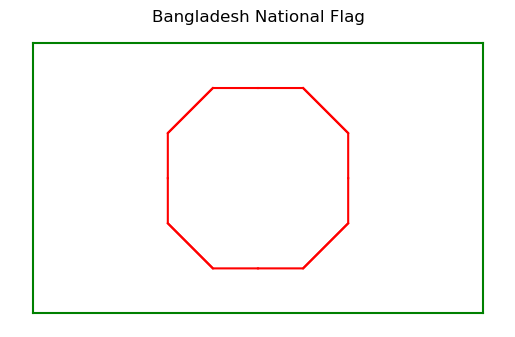

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Line drawing algorithm
def draw_line(x1, y1, x2, y2):
    is_steep = abs(y2 - y1) > abs(x2 - x1)
    
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    p = 2 * dy - dx
    
    x_values = []
    y_values = []
    x = x1
    y = y1
    
    while True:
        if is_steep:
            x_values.append(y)
            y_values.append(x)
        else:
            x_values.append(x)
            y_values.append(y)
        
        if x == x2 and y == y2:
            break
            
        if p < 0:
            p += 2 * dy
        else:
            y += sy
            p += 2 * dy - 2 * dx
        
        x += sx
        
    return x_values, y_values

# Circle drawing algorithm
def eight_way_symmetric_plot(cx, cy, x, y):
    points = []
    points.append((x + cx, y + cy))
    points.append((x + cx, -y + cy))
    points.append((-x + cx, -y + cy))
    points.append((-x + cx, y + cy))
    
    points.append((y + cx, x + cy))
    points.append((y + cx, -x + cy))
    points.append((-y + cx, -x + cy))
    points.append((-y + cx, x + cy))
    
    pointX, pointY = zip(*points)
    
    pointX = list(pointX)
    pointY = list(pointY)
    
    return pointX, pointY

def circle_drawing(cx, cy, r):
    x = 0
    y = r 
    d = 3 - 2 * r
    
    x_values = []
    y_values = []
    
    pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
    
    x_values.append(pointX)
    y_values.append(pointY)
    
    while x <= y:
        if d < 0:
            d += 4 * x + 6
        else:
            d += 4 * (x - y) + 10
            y -= 1
        
        x += 1
        pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
        
        x_values.append(pointX)
        y_values.append(pointY)
        
    return x_values, y_values

# Flag Dimensions
flag_length = 10
flag_width = 6

# Radius of the circle (one-fifth of the length of the flag)
circle_radius = flag_length / 5

# Center of the circle (near the middle of the flag)
circle_center_x = flag_length / 2
circle_center_y = flag_width / 2

# Values to be added
values = []
dashed_values = []

# Base: Draw the rectangle (flag)
values.append(draw_line(0, 0, flag_length, 0))  # Bottom baseline
values.append(draw_line(0, flag_width, flag_length, flag_width))  # Top baseline
values.append(draw_line(0, 0, 0, flag_width))  # Left side
values.append(draw_line(flag_length, 0, flag_length, flag_width))  # Right side

# Circle: Red circle in the middle of the flag
circleX, circleY = circle_drawing(circle_center_x, circle_center_y, circle_radius)

# Unpacking the values for the rectangle and circle
x_values, y_values = zip(*values)
x_values = [item for sublist in x_values for item in (sublist + [None])]
y_values = [item for sublist in y_values for item in (sublist + [None])]

# Drawing the flag
def plot_func():
    # Draw the green rectangle (flag)
    plt.plot(x_values, y_values, color = 'green')
    
    # Draw the red circle in the middle of the flag
    plt.plot(circleX, circleY, color = 'red')
    
    # Set the title and labels
    plt.title("Bangladesh National Flag")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    
    # Ensure aspect ratio is equal and hide the axes
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    
    # Show the flag
    plt.show()

# Call the function to plot the flag
plot_func()
